# 1. Time of oscillation and damping coefficients  in a nonlinear pendulum

We consider a nonlinear pendulum modeled by 
$$
\frac{d^2x}{dt^2} + 2\,\alpha  \frac{dx}{dt} + \beta\, \frac{dx}{dt}\, \left| \frac{dx}{dt} \right|  + x\, \left(1+f(x)\right)=0, 
\qquad x(0) = x_0, \dot{x}(0) = 0.
$$
Denote by  $\tau(x_0, \alpha, \beta)$ the time taking by the pendulum to complete one oscillation starting at $x_0$ with vanishing velocity. Fixed $x_0$, this notebook explores the dependence of $\tau$ on the damping coefficients $\alpha$ and $\beta$ 

In [1]:
#import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import *

In [2]:
#from scipy.integrate import ode
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [3]:
def f(x):  
    return np.sin(x)/x - 1

In [4]:
def pend(x,t,a,b):
    return [x[1], -2*x[1]*a - b*x[1]*np.abs(x[1]) - x[0]*(1+f(x[0]))] 

In [5]:
def sol(x0,a,b,tm):
    xinit = [x0,0.0]
    tt = [0.0, tm]
    return odeint(pend, xinit,tt, args=(a, b))[1]    

In [6]:
def tau(x0,a,b):
    t = 2.0*np.pi/np.sqrt(1-a*a) 
    i, niter = 0, 10
    while (i < niter):
        S = sol(x0,a,b,t) 
        t= t-S[1]/pend(S,t, a, b)[1]
        i = i+1
    return t

## 1.1 Checking procedure

In [7]:
a, b, x0 = 0.5, 0.2, 0.2
tm = tau(x0, a,b)
xinit = [x0,0.0]
tvalues =  np.linspace(0, tm, 101)
trayectory = odeint(pend, xinit,tvalues, args=(a, b))   
zero_level= np.zeros(len(tvalues))
print(sol(x0,a,b,tm)[1], tm)

-1.984089975648473e-17 7.293835637024231


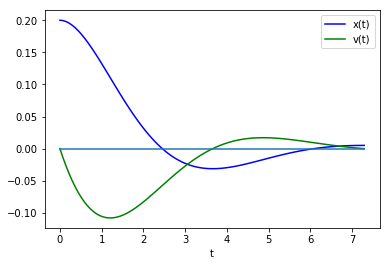

In [8]:
plt.plot(tvalues, trayectory[:, 0], 'b', label='x(t)')
plt.plot(tvalues, trayectory[:, 1], 'g', label='v(t)')
plt.plot(tvalues, zero_level)
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

## 1.2 Dependence of $\tau(x_0, \alpha, \beta)$ on the initial  position $x_0$ and the damping parameters $\alpha$ and $\beta.$
We consider underdamped oscillation ($0\le \alpha <1$)

In [9]:
npts= 150
alpha = np.linspace(0.0, 0.50, npts)
u = np.zeros(npts) 
v = np.zeros(npts)
w = np.zeros(npts)
z = np.zeros(npts)   

In [10]:
b = 0.0
for ii in range(npts):
    u[ii] = tau(0.1, alpha[ii], b)
    v[ii] = tau(0.6, alpha[ii], b)
    w[ii] = tau(1.2, alpha[ii], b)
    z[ii] = tau(1.6, alpha[ii], b)

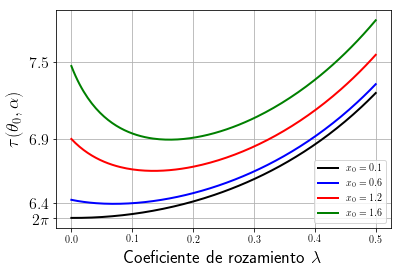

In [12]:
plt.rc('text', usetex=True)
plt.plot(alpha,u, color='black', linewidth = 2, label= r'$x_0 = 0.1$')
plt.plot(alpha,v, color='blue', linewidth = 2, label= r'$x_0 = 0.6$')
plt.plot(alpha,w, color='red', linewidth = 2, label= r'$x_0 = 1.2$')
plt.plot(alpha,z, color='green', linewidth = 2, label= r'$x_0 = 1.6$')
#plt.xticks([0,  0.05, 0.10, 0.15, 0.2], [r'$0$', r'$0.05$', r'$0.1$',r'$0.15$', r'$0.2$' ],fontsize=14)
plt.yticks([2*np.pi,  6.4, 6.9, 7.5], [r'$2\pi$', r'$6.4$',r'$6.9$', r'$7.5$'],fontsize=16)
plt.xlabel(r'Coeficiente de rozamiento $\lambda$', fontsize=18)
plt.ylabel(r'$ \tau(\theta_0,\alpha)$',fontsize=18)
plt.grid(True)
plt.legend(loc='best')
plt.savefig('oscillation_time.pdf')
plt.show()

# 2. Underdamped and overdamped solutions

We define $v = \dot{x}$ and introduce polar coordinates 
$$
r  =\sqrt{x^2+ v^2}, \quad  \tan{\theta}  =  \frac{x}{v},
$$
to obtain 
$$
\begin{split}
\dot{\theta}& =-\frac{1}{r^2}
 \left( x^2+ v^2\left(1+ f\left(x\right) \right) + 2\alpha \, x\, v +\beta\, x\, v\, |v|\right) \\
\dot{r} & = -\frac{v}{r}
 \left( 2\alpha \,   v +\beta\,  v\, |v|+ x\, f\left(x\right)\right).\\
\end{split}
$$

If $\alpha\ge 1,$  the phase plane $xv$ near the origin is made up of two open connected regions  where respectively  $\dot{\theta}<0$ and $\dot{\theta}>0.$ These two regions are separated by the nodal set 
$$  
x^2+ v^2\left(1+ f\left(x\right) \right) + 2\alpha \, x\, v +\beta\, x\, v\, |v|=0.
$$
Further, the region  
$$
N = \left\{(x,v):  \dot{\theta}< 0\right\} \cap 
\left\{ \left(x, v\right): x\ge 0, v<0\right\}
$$

is positively invariant.

## 2.1 Underdamped solutions

If $\alpha<1$ the solutions $(x,v)= (x(t), v(t))$ are underdamped for all initial value $x_0$ and all $\beta\ge 0$. The set $\dot{\theta} <0$ contains a punctured neighborhood of the origin

In [12]:
a, b = 0.7, 0.7
wd = np.pi 
xx = np.linspace(-wd,wd,300)
yy = np.linspace(-wd,wd,300)
X, V = np.meshgrid(xx, yy)
dT = -(X**2 + V**2*(1+f(X)) + 2*a*V*X + b*X*V*np.abs(V))

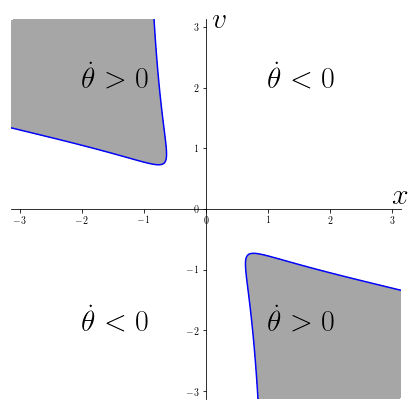

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
levels = [0.0, 25]
cp = ax.contourf(X, V, dT, levels, colors='k', alpha = 0.35)
levels = [0.0]
cp = ax.contour(X, V, dT, levels, colors='b', alpha = 0.98)
#plt.clabel(cp, inline=True, fontsize=10)
#plt.title(r'$ \dot{\theta}$', fontsize=30)
#plt.xlabel(r'$x$',fontsize=20 )
#plt.ylabel(r'$v$',fontsize=20 )
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
################################################
plt.text(1, 2, r'$\dot{\theta}<0$', fontsize=30)
plt.text(-2, -2, r'$\dot{\theta}<0$', fontsize=30)
plt.text(-2, 2, r'$\dot{\theta}>0$', fontsize=30)
plt.text(1, -2, r'$\dot{\theta}>0$', fontsize=30)
#########################################
plt.text(0.1, 3, r'$v$', fontsize=30)
plt.text(3, 0.1, r'$x$', fontsize=30)
#######################################
plt.savefig('theta_prime_underdamped.pdf')
plt.show()

## 2.2 Overdamped solutions  and the invariant set $N$

In [81]:
a, b = 1.2, 0.2

def vpp_xn(x):
    return (- a*x + np.abs(x)*np.sqrt(a**2-(1+f(x)+ b*x)))/(1+f(x)+ b*x)
def vpn_xn(x):
    return (- a*x - np.abs(x)*np.sqrt(a**2-(1+f(x)+ b*x)))/(1+f(x)+ b*x)
def vnp_xp(x):
    return (- a*x + np.abs(x)*np.sqrt(a**2-(1+f(x)- b*x)))/(1+f(x)- b*x)
def vnn_xp(x):
    return (- a*x - np.abs(x)*np.sqrt(a**2-(1+f(x)- b*x)))/(1+f(x)- b*x)

In [92]:
wd = np.pi

xp = np.linspace(0.0001,wd,500)
xn = np.linspace(-wd,-0.0001,500)

Vpp_xn = vpp_xn(xn)
Vpn_xn = vpn_xn(xn)
Vnp_xp = vnp_xp(xp)
Vnn_xp = vnn_xp(xp)

In [93]:
a, b = 1.1, 0.1
wd = np.pi 
xx = np.linspace(-wd,wd,500)
yy = np.linspace(-wd,wd,500)
X, V = np.meshgrid(xx, yy)
dT = -(X**2 + V**2*(1+f(X)) + 2*a*V*X + b*X*V*np.abs(V))

In [94]:
tm = 20
##################################
xinit = [1,0.0]
tvalues =  np.linspace(0, tm, 201)
trayectory = odeint(pend, xinit,tvalues, args=(a, b))  
x_try1 = trayectory[:, 0]
v_try1 = trayectory[:, 1]
##################################
xinit = [2,0.0]
tvalues =  np.linspace(0, tm, 201)
trayectory = odeint(pend, xinit,tvalues, args=(a, b))  
x_try2 = trayectory[:, 0]
v_try2 = trayectory[:, 1]
#########################################
xinit = [3.0, 0.0]
tvalues =  np.linspace(0, tm, 201)
trayectory = odeint(pend, xinit,tvalues, args=(a, b))  
x_try3 = trayectory[:, 0]
v_try3 = trayectory[:, 1]

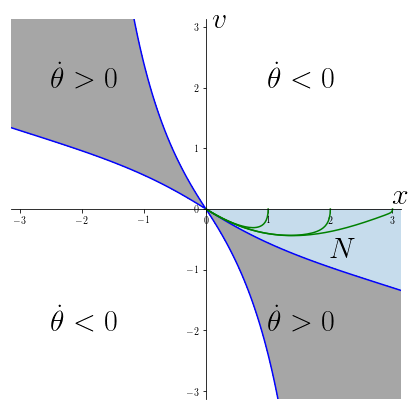

In [96]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
levels = [0.0, 25]
cp = ax.contourf(X, V, dT, levels, colors='k', alpha = 0.35)
levels = [0.0]
cp = ax.contour(X, V, dT, levels, colors='b', alpha = 0.98)
#plt.clabel(cp, inline=True, fontsize=10)
#plt.title(r'$ \dot{\theta}$', fontsize=30)
#plt.xlabel(r'$x$',fontsize=20 )
#plt.ylabel(r'$v$',fontsize=20 )
####################################
ax.plot(x_try1, v_try1, 'g')
ax.plot(x_try2, v_try2, 'g')
ax.plot(x_try3, v_try3, 'g')
#####################################
ax.fill_between(xp, 0, Vnp_xp, alpha = 0.25)
#########################################
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
################################################
plt.text(1, 2, r'$\dot{\theta}<0$', fontsize=30)
plt.text(-2.5, -2, r'$\dot{\theta}<0$', fontsize=30)
plt.text(-2.5, 2, r'$\dot{\theta}>0$', fontsize=30)
plt.text(1, -2, r'$\dot{\theta}>0$', fontsize=30)
plt.text(2, -0.8, r'$N$', fontsize=30)
#########################################
plt.text(0.1, 3, r'$v$', fontsize=30)
plt.text(3, 0.1, r'$x$', fontsize=30)
#######################################
plt.savefig('theta_prime_overdamped.pdf')
plt.show()